In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.read_csv('Data/links.csv')

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
movies = pd.read_csv('Data/movies.csv')
movies.head()

#movies[movies.movieId==6016]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('Data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags = pd.read_csv('Data/tags.csv')
tags.head(40)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [6]:
tags.groupby(by="tag").count().sort_values('userId', ascending=False).head(60)

,userId,movieId,timestamp
tag,,,
In Netflix queue,131,131,131
atmospheric,36,36,36
thought-provoking,24,24,24
superhero,24,24,24
Disney,23,23,23
surreal,23,23,23
funny,23,23,23
religion,22,22,22
dark comedy,21,21,21


### Merge movies.csv, ratings.csv, tags.csv

In [7]:
movies_ratings = movies.merge(ratings, how='inner', on = 'movieId')
movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [8]:
movies_ratings.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [9]:
movies_ratings.shape

(100836, 6)

In [10]:
df = movies_ratings.merge(tags, how='left', on = ['movieId', 'userId'] )
df.drop_duplicates(inplace=True)
df

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN,NaN
...,...,...,...,...,...,...,...,...
102672,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,NaN,NaN
102673,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,NaN,NaN
102674,193585,Flint (2017),Drama,184,3.5,1537109805,NaN,NaN
102675,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,NaN,NaN


### Extracting year from the title

In [11]:
# extracting the 'year'
df.title = df.title.str.strip()
df['year'] = df.title.str[-5:-1]
df.head()

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN,NaN,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN,NaN,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN,NaN,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN,NaN,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN,NaN,1995


In [12]:
df.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', 'lon ', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', 'r On', ' Roa', 'atso', 'imal', 'erso',
      

In [13]:
# replace year mannually 
# report the title and search year on internet  
df[df.year=='lon '] # title 'Babylon 5' 1993? 
df[df.year=='r On'] # title 'Ready Player One'  2018
df[df.year==' Roa'] # title 'Hyena Road'   2015
df[df.year=='atso'] # title 'The Adventures of Sherlock Holmes and Doctor W..'  1980
df[df.year=='imal'] # title 'Nocturnal Animals'  2016
df[df.year=='erso'] # title 'Paterson'  2016
df[df.year=='ligh'] # title 'Moonlight'  2016
df[df.year=='he O'] # title 'The OA'  2016
df[df.year=='osmo'] # title 'Cosmos' 2014
df[df.year==' Bab'] # title 'Maria Bamford: Old Baby' 2017
df[df.year=='ron '] # title 'Generation Iron 2' 2017
df[df.year=='irro'] # title 'Black Mirror' 2011

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y,year
102428,176601,Black Mirror,(no genres listed),62,5.0,1525795252,NaN,NaN,irro


In [14]:
df.replace({'year' : { 'lon ':1993, 'r On':2018, ' Roa':2015, 'atso':1980, 
                      'imal':2016, 'erso':2016, 'ligh':2016, 'he O':2016,
                     'osmo':2014, ' Bab':2017, 'ron ':2017,'irro':2011 }}, inplace=True)

In [15]:
df.year = df.year.astype(int)

In [16]:
df.year.unique()

array([1995, 1994, 1996, 1976, 1992, 1967, 1993, 1964, 1977, 1965, 1982,
       1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970, 1955, 1959,
       1968, 1988, 1997, 1972, 1943, 1952, 1951, 1957, 1961, 1958, 1954,
       1934, 1944, 1960, 1963, 1942, 1941, 1953, 1939, 1950, 1946, 1945,
       1938, 1947, 1935, 1936, 1956, 1949, 1932, 1975, 1974, 1971, 1979,
       1987, 1986, 1980, 1978, 1985, 1966, 1962, 1983, 1984, 1948, 1933,
       1931, 1922, 1998, 1929, 1930, 1927, 1928, 1999, 2000, 1926, 1919,
       1921, 1925, 1923, 2001, 2002, 2003, 1920, 1915, 1924, 2004, 1916,
       1917, 2005, 2006, 1902, 1903, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 1908])

<AxesSubplot:xlabel='year'>

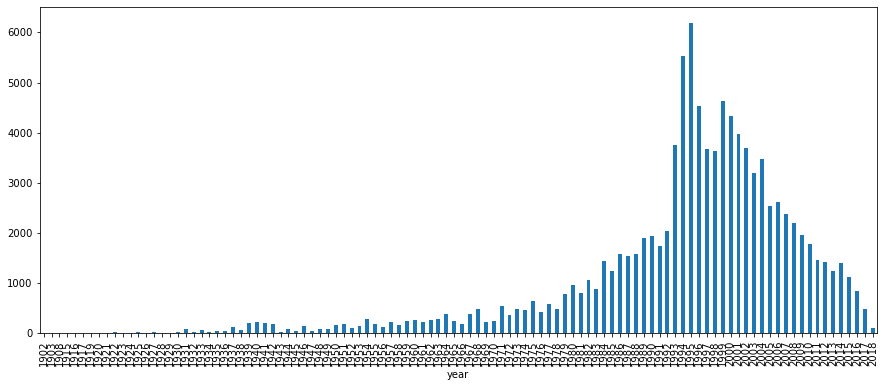

In [17]:

df.groupby('year').count().title.plot(kind='bar', figsize=(15,6))


### IMBD database 
#### from IMBD database, we include IMBD rating, number of votes, directors

In [35]:
# Directors
df_crew = pd.read_csv('Data/title.crew.tsv',sep='\t')

# Delete 'writers' 
df_crew.drop(['writers'], axis=1, inplace=True)

# Drop missing values in 'directors'
df_crew.dropna(axis=0, subset=['directors'], inplace=True)

# Drop duplicate in 'tconst', film id, removing any duplicate films
df_crew.drop_duplicates(subset='tconst', inplace=True)

# Explode out films with multiple directors
df_dir = df_crew.assign(director = df_crew.directors.str.split(',')).explode('director')

# Drop 'directors' column because we have new column
df_dir.drop('directors', axis = 1, inplace=True)


In [38]:
# name of directors
df_name = pd.read_csv('Data/name.basics.tsv',sep='\t')
df_name
# Keep only columns 'nconst', 'primary_name'
df_name = df_name[['nconst', 'primaryName' ]]

nconst  primaryName
False   False          11305109
dtype: int64

In [40]:
# Merging the director ids with the director names
director = df_dir.merge(df_name, how = 'inner', left_on = 'director', right_on = 'nconst')

director.drop(['director', 'nconst'], axis=1, inplace=True)

director.head()

In [44]:
director.head()

,tconst,primaryName
0,tt0000001,William K.L. Dickson
1,tt0000005,William K.L. Dickson
2,tt0000006,William K.L. Dickson
3,tt0000007,William K.L. Dickson
4,tt0000008,William K.L. Dickson


In [52]:
director.groupby('primaryName').count().sort_values('tconst', ascending=False).head(20)

,tconst
primaryName,
Nivedita Basu,12158
Saibal Banerjee,10014
Anil v Kumar,8859
Mário Márcio Bandarra,6765
Henrique Martins,6741
Paul Alter,6306
Kevin McCarthy,6139
Atílio Riccó,5826
Duma Ndlovu,5654


In [20]:
# IMBD Rating and number of votes 
imbd_rating = pd.read_csv('Data/title.ratings.tsv',sep='\t')

In [ ]:
# change the imdb movie ID to numeric and remove the first two characters to match imdbId in links.csv .

In [45]:
# merge IMBD rating, number of votes with director 
imbd_rating[imbd_rating.tconst=='tt0114709']
imbd = imbd_rating.merge(director, how = 'left', on = 'tconst')


In [48]:
imbd.isnull().sum()

tconst                0
averageRating         0
numVotes              0
primaryName      186990
dtype: int64

In [23]:
pd.read_csv('Data/links.csv')

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
